<a href="https://colab.research.google.com/github/dmorton714/data-2-demo/blob/main/answers_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sqlite3 import connect

## **We are going to read in another data set to answer a new question. *Is there evidence for a correlation between income level and the rate of uninsured for county level data?***

In [ ]:
income = pd.read_csv("https://raw.githubusercontent.com/dmorton714/data-2-demo/main/kaggle_income.csv", encoding='latin-1') # this one is encoded in latin-1
income.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [ ]:
coverage = pd.read_csv("https://raw.githubusercontent.com/dmorton714/data-2-demo/main/Insurance%20Coverage%20-%20All%20Demographics%20By%20County.csv")
coverage.head()

,index,year,statefips,state_name,countyfips,County,Metric,Value
0,0,01-01-08,1,Alabama,0,State ofAlabama,Number insured,6.540953e+06
1,1,01-01-08,1,Alabama,0,State ofAlabama,Number uninsured,1.181000e+06
2,2,01-01-08,1,Alabama,0,State ofAlabama,Percent Uninsured (All),2.073000e-01
3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,3.847400e+04
4,4,01-01-08,1,Alabama,1,Autauga County,Number uninsured,5.880000e+03


In [ ]:
conn = connect(':memory:')
# create tables
income.to_sql("income", conn)
coverage.to_sql("coverage", conn)
# convenient function
def sql(a_string):
    return(pd.read_sql(a_string, conn))

# Coverage Table

1) Find all the 'Metric' types.


In [ ]:
sql("SELECT distinct Metric FROM coverage")

,Metric
0,Number insured
1,Number uninsured
2,Percent Uninsured (All)


In [ ]:
# sql('PRAGMA table_info(income);')
sql('PRAGMA table_info(coverage);')

,cid,name,type,notnull,dflt_value,pk
0,0,level_0,INTEGER,0,None,0
1,1,index,INTEGER,0,None,0
2,2,year,TEXT,0,None,0
3,3,statefips,INTEGER,0,None,0
4,4,state_name,TEXT,0,None,0
5,5,countyfips,INTEGER,0,None,0
6,6,County,TEXT,0,None,0
7,7,Metric,TEXT,0,None,0
8,8,Value,REAL,0,None,0


2) What does 'countyfips' = 0 indicate ?
<br>
This indicates that the state level data is on '0' value in the countyfips row.


In [ ]:
sql('SELECT * FROM coverage WHERE countyfips = 0')

,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value
0,0,0,01-01-08,1,Alabama,0,State ofAlabama,Number insured,6.540953e+06
1,1,1,01-01-08,1,Alabama,0,State ofAlabama,Number uninsured,1.181000e+06
2,2,2,01-01-08,1,Alabama,0,State ofAlabama,Percent Uninsured (All),2.073000e-01
3,204,204,01-01-08,2,Alaska,0,State ofAlaska,Number insured,8.847850e+05
4,205,205,01-01-08,2,Alaska,0,State ofAlaska,Number uninsured,2.114540e+05
...,...,...,...,...,...,...,...,...,...
1219,76357,76357,01-01-15,55,Wisconsin,0,State ofWisconsin,Number uninsured,6.060820e+05
1220,76358,76358,01-01-15,55,Wisconsin,0,State ofWisconsin,Percent Uninsured (All),9.700000e-02
1221,76575,76575,01-01-15,56,Wyoming,0,State ofWyoming,Number insured,8.286770e+05
1222,76576,76576,01-01-15,56,Wyoming,0,State ofWyoming,Number uninsured,1.265330e+05


3) Find the number of counties listed for Alabama.
<br>
Had to take into effect the countyfips in ('0')

In [ ]:
sql("""SELECT COUNT(distinct County) 
  FROM 
    coverage  
  WHERE 
    state_name = 'Alabama'
  AND
    countyfips not in ('0')""")

,COUNT(distinct County)
0,67


4) Which county in Arkansas has the least number of insured?


In [ ]:
sql("""SELECT 
    County, Metric, MIN(Value) 
  FROM 
    coverage where state_name = 'Arkansas'
  AND
     Metric = 'Number insured'""")

,County,Metric,MIN(Value)
0,Calhoun County,Number insured,3202.0


In [ ]:
# sql("""SELECT state_name, County, Metric, Value
#   FROM 
#     coverage
#   WHERE 
#     Metric = (SELECT MIN('Number uninsured') FROM coverage) and state_name = 'Arkansas'
#   ORDER BY 
#     Value ASC;""")

In [ ]:
# sql("""SELECT state_name, County, Metric, Value
#   FROM 
#     coverage
#   WHERE 
#     Metric = (SELECT MIN('Percent Uninsured (All)') FROM coverage) and state_name = 'Arkansas'
#   ORDER BY 
#     Value ASC;""")

5) Which state has the the highest number of total uninsured?



In [ ]:
sql("""SELECT 
    state_name, Metric, max(Value) 
  FROM 
    coverage 
  WHERE 
    metric = 'Number uninsured'
  AND 
    countyfips not in ('0')""")

,state_name,Metric,max(Value)
0,California,Number uninsured,2248384.0


In [ ]:
sql("""SELECT 
    state_name, Metric, max(Value) 
  FROM 
    coverage 
  WHERE 
    metric = 'Number uninsured'
  AND 
    countyfips != 0""")



,state_name,Metric,max(Value)
0,California,Number uninsured,2248384.0


# Income Table

6) For the income dataset how many different place types 'Type' are there?


In [ ]:
sql("select distinct Type from income")

,Type
0,City
1,Town
2,CDP
3,Track
4,Borough
5,Village
6,County
7,Municipality
8,Urban
9,Community


 7) What is the maximum 'Mean' income for a county in the state of Washington?


In [ ]:
sql("""SELECT 
    County, max(Mean) 
  FROM
    income where state_name = 'Washington'""")

,County,max(Mean)
0,Adams County,187248


8) Which county in the state of Washington has the highest 'Mean' income?


In [ ]:
sql("""SELECT 
    County, max(Mean) 
  FROM
    income where state_name = 'Washington'""")

,County,max(Mean)
0,Adams County,187248


9) How much does the highest 'Mean' income for the state of Washington differ from the highest 'Median' income?
join the datasets --


In [ ]:
sql("""SELECT
    max(Median), max(Mean), max(Median) - max(Mean) 
  AS 
    Difference 
  FROM 
    income 
  WHERE 
    State_Name = 'Washington'""")

,max(Median),max(Mean),Difference
0,300000,187248,112752


# Join Income and Coverage Tables

10) Perform an inner join of the coverage and income tables.


In [ ]:
sql("""SELECT 
    * 
  FROM
    coverage AS a 
  INNER JOIN 
    income AS b 
  ON 
    a.County = b.County
  LIMIT 
    3273""")
# limited to speed up notebook 

,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value,index,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,36,...,36022,334,64250372,132799,32.579539,-86.454318,63066,57698,41175,949.115808
1,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,64,...,35004,205,110354665,589709,33.546797,-86.430618,45862,32942,40674,1123.839610
2,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,65,...,35120,205,145753222,539155,33.717173,-86.382482,62222,56867,43036,1666.540389
3,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,66,...,35242,205,10526469,723081,33.407320,-86.720401,90262,71401,66042,1559.238222
4,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,67,...,35242,205,7151912,58061,33.400727,-86.692573,92018,74570,65160,1035.308758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268,197,197,01-01-08,1,Alabama,129,Washington County,Percent Uninsured (All),0.159,29345,...,84738,435,24433795,127467,37.176641,-113.680060,65215,51494,55435,1651.880335
3269,197,197,01-01-08,1,Alabama,129,Washington County,Percent Uninsured (All),0.159,29354,...,84770,435,8864753,0,37.390369,-113.506033,105926,300000,48033,21.098836
3270,197,197,01-01-08,1,Alabama,129,Washington County,Percent Uninsured (All),0.159,29596,...,5651,802,236272,12982,44.269412,-72.487130,54118,300000,33422,26.998400
3271,197,197,01-01-08,1,Alabama,129,Washington County,Percent Uninsured (All),0.159,29603,...,5673,802,995741,38493,44.189033,-72.824730,64286,300000,57274,87.665008


11) Add an order by 'Mean' income to the join statement, and display the first 20 rows.


In [ ]:
sql("""SELECT 
    * 
  FROM
    coverage AS a 
  INNER JOIN 
    income AS b 
  ON 
    a.County = b.County
  ORDER BY 
    Mean ASC
  LIMIT
  20""")

,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value,index,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,118,...,36250,256,89660986,294151,33.718820,-85.952354,0,0,0,0.0
1,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,367,...,36509,251,0,780526158,30.269883,-88.292359,0,0,0,0.0
2,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.000,504,...,36608,251,1900631,0,30.695143,-88.182485,0,0,0,0.0
3,4,4,01-01-08,1,Alabama,1,Autauga County,Number uninsured,5880.000,118,...,36250,256,89660986,294151,33.718820,-85.952354,0,0,0,0.0
4,4,4,01-01-08,1,Alabama,1,Autauga County,Number uninsured,5880.000,367,...,36509,251,0,780526158,30.269883,-88.292359,0,0,0,0.0
5,4,4,01-01-08,1,Alabama,1,Autauga County,Number uninsured,5880.000,504,...,36608,251,1900631,0,30.695143,-88.182485,0,0,0,0.0
6,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,118,...,36250,256,89660986,294151,33.718820,-85.952354,0,0,0,0.0
7,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,367,...,36509,251,0,780526158,30.269883,-88.292359,0,0,0,0.0
8,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,504,...,36608,251,1900631,0,30.695143,-88.182485,0,0,0,0.0
9,144,144,01-01-08,1,Alabama,95,Marshall County,Number insured,60627.000,26313,...,57430,605,615940,0,45.881710,-97.713849,0,0,0,0.0


12) Reverse the order of 'Mean' income and display the first 20 rows.


In [ ]:
sql("""SELECT 
    * 
  FROM
    coverage AS a 
  INNER JOIN 
    income AS b 
  ON 
    a.County = b.County
  ORDER BY 
    Mean DESC
  LIMIT
    20""")

,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value,index,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,111,111,01-01-08,1,Alabama,73,Jefferson County,Number insured,478101.000,56,...,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
1,112,112,01-01-08,1,Alabama,73,Jefferson County,Number uninsured,78749.000,56,...,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
2,113,113,01-01-08,1,Alabama,73,Jefferson County,Percent Uninsured (All),0.141,56,...,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
3,273,273,01-01-08,2,Alaska,240,Southeast Fairbanks Census Area,Number insured,4346.000,560,...,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493
4,274,274,01-01-08,2,Alaska,240,Southeast Fairbanks Census Area,Number uninsured,1818.000,560,...,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493
5,275,275,01-01-08,2,Alaska,240,Southeast Fairbanks Census Area,Percent Uninsured (All),0.295,560,...,99737,907,18298887,0,64.152838,-145.906385,242857,300000,25317,0.866493
6,444,444,01-01-08,5,Arkansas,69,Jefferson County,Number insured,50669.000,56,...,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
7,445,445,01-01-08,5,Arkansas,69,Jefferson County,Number uninsured,12253.000,56,...,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
8,446,446,01-01-08,5,Arkansas,69,Jefferson County,Percent Uninsured (All),0.195,56,...,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
9,570,570,01-01-08,6,California,1,Alameda County,Number insured,1137161.000,3341,...,92110,619,1961071,81282,32.737719,-117.197744,242857,300000,25317,0.733187


13) Add an order by 'Percent Uninsured (All)', and display the first 20 rows.


In [ ]:
sql("""SELECT 
    * 
  FROM
    coverage AS a 
  INNER JOIN 
    income AS b 
  ON 
    a.County = b.County
  ORDER BY 
    Metric = 'Percent Uninsured (All)' DESC
  LIMIT
    20""")

,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value,index,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,36,...,36022,334,64250372,132799,32.579539,-86.454318,63066,57698,41175,949.115808
1,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,64,...,35004,205,110354665,589709,33.546797,-86.430618,45862,32942,40674,1123.839610
2,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,65,...,35120,205,145753222,539155,33.717173,-86.382482,62222,56867,43036,1666.540389
3,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,66,...,35242,205,10526469,723081,33.407320,-86.720401,90262,71401,66042,1559.238222
4,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,67,...,35242,205,7151912,58061,33.400727,-86.692573,92018,74570,65160,1035.308758
5,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,68,...,35043,205,16899453,292332,33.356790,-86.675410,78399,71839,54844,641.301001
6,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,69,...,35114,205,8011090,34567,33.233236,-86.849908,85122,75896,58979,959.142978
7,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,70,...,36271,256,177682000,7624905,33.768762,-86.037283,66000,54091,47663,1009.159632
8,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,71,...,35477,205,536090556,10788078,32.863881,-88.262331,34064,28981,28466,438.079249
9,5,5,01-01-08,1,Alabama,1,Autauga County,Percent Uninsured (All),0.133,72,...,35160,256,10137995,8419,33.454831,-86.068082,38882,27264,45128,922.631146


14) Reverse the order of  'Percent Uninsured (All)', and display the first 20 rows.


In [ ]:
sql("""SELECT 
    * 
  FROM
    coverage AS a 
  INNER JOIN 
    income AS b 
  ON 
    a.County = b.County
  ORDER BY 
    Metric = 'Percent Uninsured (All)' ASC
  LIMIT
    20""")

,level_0,index,year,statefips,state_name,countyfips,County,Metric,Value,index,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,36,...,36022,334,64250372,132799,32.579539,-86.454318,63066,57698,41175,949.115808
1,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,64,...,35004,205,110354665,589709,33.546797,-86.430618,45862,32942,40674,1123.839610
2,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,65,...,35120,205,145753222,539155,33.717173,-86.382482,62222,56867,43036,1666.540389
3,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,66,...,35242,205,10526469,723081,33.407320,-86.720401,90262,71401,66042,1559.238222
4,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,67,...,35242,205,7151912,58061,33.400727,-86.692573,92018,74570,65160,1035.308758
5,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,68,...,35043,205,16899453,292332,33.356790,-86.675410,78399,71839,54844,641.301001
6,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,69,...,35114,205,8011090,34567,33.233236,-86.849908,85122,75896,58979,959.142978
7,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,70,...,36271,256,177682000,7624905,33.768762,-86.037283,66000,54091,47663,1009.159632
8,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,71,...,35477,205,536090556,10788078,32.863881,-88.262331,34064,28981,28466,438.079249
9,3,3,01-01-08,1,Alabama,1,Autauga County,Number insured,38474.0,72,...,35160,256,10137995,8419,33.454831,-86.068082,38882,27264,45128,922.631146


15) Is there evidence for a correlation between income level and the rate of uninsured for county level data?

<Axes: >

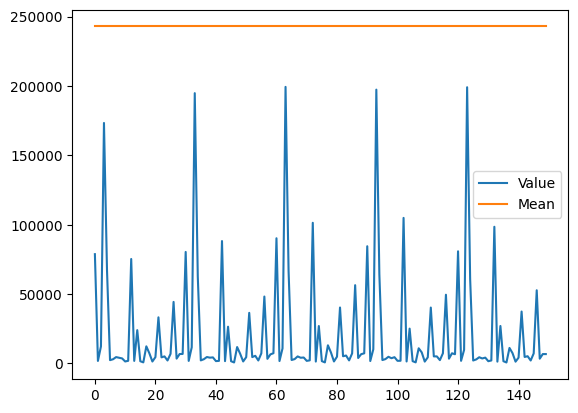

In [ ]:
sql("""SELECT 
    Metric, Value, Mean
  FROM
    coverage AS a 
  INNER JOIN 
    income AS b 
  ON 
    a.County = b.County
  WHERE 
    Metric = 'Number uninsured'
  AND
    countyfips not in ('0')
  ORDER BY 
    Mean DESC 
  LIMIT 
  150""").plot()

<Axes: >

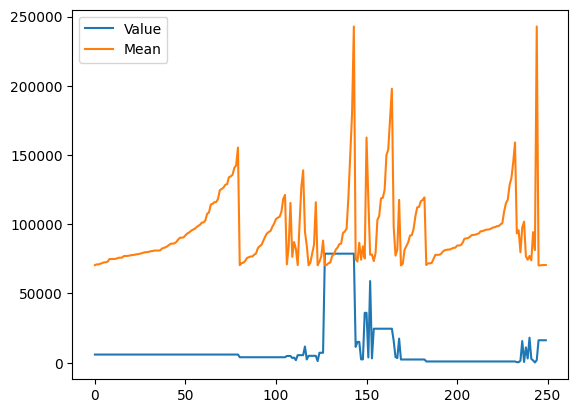

In [ ]:
sql("""SELECT 
    Metric, Value, Mean
  FROM
    coverage AS a 
  INNER JOIN 
    income AS b 
  ON 
    a.County = b.County
  WHERE 
    Metric = 'Number uninsured'
  AND
    countyfips not in ('0')
  ORDER BY 
    Mean < 70000 ASC
  LIMIT 
  250""").plot()